In [1]:
# Fiz o download das reanálises do CFSR (https://rda.ucar.edu) no formato grib2.
# Esse script converte os arquivos grib2 para netcdf4.

# Pacotes necessários
import numpy as np
import pygrib
from netCDF4 import Dataset, date2num,num2date
import datetime as dt
import matplotlib.pyplot as plt

#--- Defino os anos de interesse. Veja que os arquivos baixados são ordenados
#    atraves de indices com anos e meses. Usarei isso num loop posteriormente
yeari=1980 # fist year to convert
yearf=1981 # last+1 year to convert

#---
print('Hello world') # Saudosismo 

Hello world


In [2]:
# Utilizei o script do Unidata para a criação/escrita do arquivo Netcdf
#Fonte: https://unidata.github.io/python-training/workshop/Bonus/netcdf-writing/

#---
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass

# Difine o nome do arquivo .nc de saída
ncfile = Dataset('CFSR_v10m_'+str(yeari)+'-'+str(yearf)+'.nc',mode='w',format='NETCDF4_CLASSIC') 
print(ncfile)

# Defining file dimensions
# Fiz o download de dados numa grade de 2.5x2.5 graus. 
# Se necessário, ajuste os tamanhos das dimensios  lat_dim e lon_dim 
lat_dim = ncfile.createDimension('lat', 73)     # latitude axis
lon_dim = ncfile.createDimension('lon', 144)    # longitude axis
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
nlats = len(lat_dim); nlons = len(lon_dim)

# Defining some attributes
lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'
time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'hours since 1800-01-01'
time.long_name = 'time'
# Define a 3D variable to hold the data
temp = ncfile.createVariable('temp',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
temp.units = 'K' # degrees Kelvin
temp.standard_name = 'air_temperature' # this is a CF standard name

# Write latitudes, longitudes.
lat[:] =  -90. + (180./(nlats-1))*np.arange(nlats) # south pole to north pole
lon[:] = (360./(nlons))*np.arange(nlons) # Greenwich meridian eastward


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


In [2]:
# Se quiser ver a lista de variáveis dentro do .grb2, descomente o comando abaixo.
# Com isso voce pode selecionar exatamente quais variáveis extrair.

#
file='pgblnl.gdas.198001.grb2' # coloque aqui o arquivo que voce tem disponível
grbs = pygrib.open(file) 
for grb in grbs:
    print(grb)

1:Geopotential Height:gpm (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
2:Temperature:K (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
3:Relative humidity:% (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
4:Specific humidity:kg kg**-1 (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
5:Vertical velocity:Pa s**-1 (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
6:U component of wind:m s**-1 (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
7:V component of wind:m s**-1 (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
8:Absolute vorticity:s**-1 (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):from 198001010000
9:Ozone mixing ratio:kg kg**-1 (avg):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0-6 hrs (avg):fro

In [5]:

# Crio uma lista com todos os arquivos .grb2 para os anos selecionados (yeari até yearf), 
# do mes 01 até o mes 12;
files=['pgblnl.gdas.'+"%04d" %year+"%02d" % month+'.grb2' for year in range(yeari,yearf,1)
       for month in range(1,13,1)]


#---
ntimes=len(files) # Defino o tamanho da dimensão Time do netcdf
rec=0 # às vezes sinto falta do fortran                             
for file in files:
    print(file)                                          
    grbs = pygrib.open(file)                            # Abre o arquivo  .grb2
    selected_grb = grbs.select(name='Temperature')[44]  # Filtro as variáveis que tem no nome a palavra
                                                        # "Temperature", e seleciono a ocorrência número
                                                        # 44, que é a variável que tenho interesse nesse
                                                        # momento
    print(selected_grb)                                 # Imprimo p/ ter certeza que estou lendo o campo
                                                        # correto em cada arquivo
    aux, lats, lons = selected_grb.data()               # Leio o campo de interesse
    temp[rec,:,:]=aux[::-1,:]                           # Inverto a dimensão Y, para vizualizar no Ferret
    rec+=1                                              # Atualizo o contador
    

pgblnl.gdas.198001.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198001010000
pgblnl.gdas.198002.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198002010000
pgblnl.gdas.198003.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198003010000
pgblnl.gdas.198004.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198004010000
pgblnl.gdas.198005.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198005010000
pgblnl.gdas.198006.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198006010000
pgblnl.gdas.198007.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma value:fcst time 0-6 hrs (avg):from 198007010000
pgblnl.gdas.198008.grb2
500:Temperature:K (avg):regular_ll:sigma:level 0.995 sigma 

In [4]:

# Até aqui os dados da dimensão Tempo não foram definidos. Fazemos isso agora!
# Por ser uma média mensal, definirei apenas o dia 15 de cada mes, o que não é exatamente a
# metade para todos os meses. Isso não afetará meus cálculos, mas é preciso ter isso em mente
# caso pretenda interpolar valores posteriormente.
dates = [dt.datetime(year,month,15,0) for year in range(yeari,yearf,1) for month in range(1,13,1) ]
times = date2num(dates, time.units)
time[:] = times


In [6]:
# É preciso fechar o arquivo .nc para que todos os dados fiquem salvos.
ncfile.close(); print('Dataset is closed!')


Dataset is closed!


/home/wlademir/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/wlademir/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


(12, 73, 144)


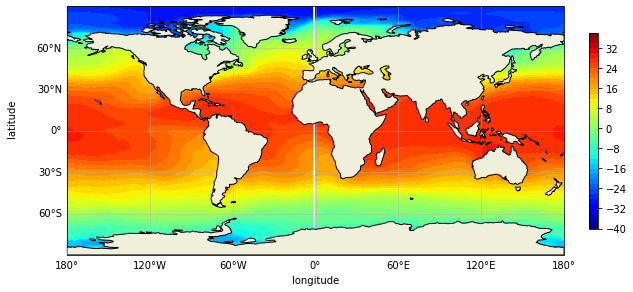

In [9]:
# Agora vamos abrir o arquivo criado e plotar alguma coisa só p/ ter certeza que funcionou.

ncfile = Dataset('CFSR_t2m_'+str(yeari)+'-'+str(yearf)+'.nc',mode='r',format='NETCDF4_CLASSIC') 
lon=ncfile['lon'][:]
lat=ncfile['lat'][:]
t2m=ncfile['temp'][:] #Grab t=10, for instance

# Vou plotar com o cartopy
import cartopy.crs as ccrs
import cartopy as cart


fig, ax1 = plt.subplots(nrows=1, ncols=1,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(11,9))
cs=ax1.contourf(lon,lat,t2m[10,::]-273.15,levels=range(-40,40,2),transform=ccrs.PlateCarree(),cmap='jet')
ax1.add_feature(cart.feature.LAND, zorder=100,edgecolor='k')
ax1.text(-0.10, 0.55, 'latitude', va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax1.transAxes)
ax1.text(0.5, -0.12, 'longitude', va='bottom', ha='center',
                rotation='horizontal', rotation_mode='anchor',
                transform=ax1.transAxes)
gl = ax1.gridlines(draw_labels = True,alpha=0.5) # label all axes
gl.xlabels_top = False # turn off top label
gl.ylabels_right = False # turn off right label
cbar =  plt.colorbar(cs, ax=ax1,extend="both", shrink=0.4,pad=0.04)  # Colorbar engloba todas as figuras 




(12, 73, 144)


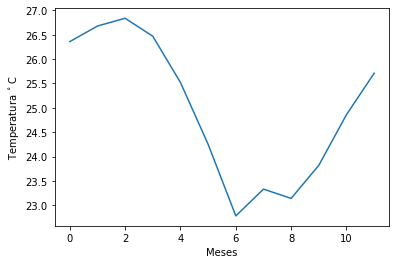

In [14]:
# Uma série temporal p/ complementar
print(np.shape(t2m))
plt.plot(t2m[:,30,30]-273.15)
plt.xlabel('Meses')
plt.ylabel('Temperatura $^\circ$C ' )

plt.show()

In [ ]:
# Tudo ok!